# Data Wrangling

This is the second step in our data cleaning process. In the [first step](./Data%20Aggregation.ipynb), we aggregated data from the NYC Taxi and Limousine Commission and sampled it into a representative subset. In this phase, we will wrangle and clean the dataset, carefully looking at outliers, disproportionate data, invalid entries, and more.

Here are the key issues we address:
1. Date-Range Validation
2. Dealing With Invalid Trip Durations
3. Trip Distance Cleaning
4. Fare Amount Cleaning
5. Cleaning Other Columns and Categorizing Data
6. Dealing With Disprportionate Data

In [885]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [886]:
# Read aggrgated data for 2017, remembering it was sampled to include every 500th element.
data = pd.read_csv('data/tripdata_2017.csv', parse_dates=[0, 2], index_col=0)

Notice the dataset is complete and we have no missing values.

In [887]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267132 entries, 2001-01-01 23:39:13 to 2017-12-31 23:56:35
Data columns (total 8 columns):
VendorID                 267132 non-null int64
tpep_dropoff_datetime    267132 non-null datetime64[ns]
passenger_count          267132 non-null int64
trip_distance            267132 non-null float64
PULocationID             267132 non-null int64
DOLocationID             267132 non-null int64
payment_type             267132 non-null int64
fare_amount              267132 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 18.3 MB


## Date-Range Validation

Let's start by checking the `head` and `tail` of the dataset to see if there are any entries outside of 2017. Remember, the dataset is already sorted by `pickup date/time`, so `head` and `tail` work perfectly here.

In [888]:
# Check for records earlier than 2017
data.head(10)

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount
tpep_pickup_datetime,,,,,,,,
2001-01-01 23:39:13,2,2001-01-02 00:01:22,1,0.56,230,163,2,11.0
2001-01-06 06:10:12,2,2001-01-06 21:00:35,1,0.00,7,7,2,2.5
2003-01-14 00:17:13,2,2003-01-14 00:17:51,1,0.00,264,264,2,1.5
2008-12-31 17:48:27,2,2008-12-31 17:57:27,1,0.90,162,264,2,7.5
2008-12-31 23:34:04,2,2008-12-31 23:39:41,1,0.93,237,140,2,5.5
2017-01-01 00:00:02,1,2017-01-01 00:03:50,1,0.50,48,48,2,4.0
2017-01-01 00:03:37,2,2017-01-01 00:12:37,1,1.39,79,249,1,8.0
2017-01-01 00:06:01,2,2017-01-01 00:13:45,1,1.54,209,13,2,7.5
2017-01-01 00:07:54,2,2017-01-01 00:17:34,1,1.86,141,233,1,8.5


In [889]:
# Check for records later than 2017
data.tail(10)

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount
tpep_pickup_datetime,,,,,,,,
2017-12-31 23:30:33,2,2017-12-31 23:33:10,1,0.53,161,161,1,4.0
2017-12-31 23:32:43,2,2017-12-31 23:42:59,2,1.51,87,148,1,8.5
2017-12-31 23:35:13,2,2017-12-31 23:48:19,3,1.77,79,45,1,9.0
2017-12-31 23:37:35,2,2017-12-31 23:50:52,1,1.30,4,79,2,10.0
2017-12-31 23:40:18,1,2017-12-31 23:43:40,1,0.50,166,24,2,4.5
2017-12-31 23:42:46,2,2017-12-31 23:52:25,1,2.13,263,43,2,9.0
2017-12-31 23:45:26,1,2018-01-01 00:01:48,2,3.40,141,234,1,14.0
2017-12-31 23:48:11,2,2018-01-01 00:04:11,1,4.28,48,41,2,15.0
2017-12-31 23:51:53,1,2017-12-31 23:53:31,0,0.60,238,151,2,4.0


It looks like there are 5 entries at the beginning of the dataset that need to be removed. Let's fix that below.

In [890]:
# Remove first 5 entries (not in 2017).
data = data[5:]

## Dealing With Invalid Trip Durations
Next, let's look at records where `pickup time` and `dropoff time` do not make sense relative to each other. Specifically, we need to address two cases:
1. Records where `trip_duration <= 0` or very short.
2. Records where `trip duration` is unrealistically long.

Before we do that though, let's actually calculate the `trip duration` and store it in a new column (as seconds).

In [891]:
# Create trip duration column (stored as seconds)
data['trip_duration'] = (data.tpep_dropoff_datetime - data.index).transform(lambda x: x.total_seconds())

Now that we have `trip duration`, let's look at the `value_counts()` of all rides that lasted less than or equal to 10 seconds.

In [892]:
# Value counts for all trip durations <= 10 seconds.
data[data.trip_duration <= 10].trip_duration.value_counts().sort_index()

-2681.0      1
-784.0       1
 0.0       197
 1.0         8
 2.0        40
 3.0        51
 4.0        66
 5.0        64
 6.0        32
 7.0        48
 8.0        35
 9.0        20
 10.0       31
Name: trip_duration, dtype: int64

The first three rows with `trip duration <= 0` are obviously invalid. But even for  trip durations that lasted a few seconds, 10's of seconds, or even a few minutes... do we really want such records representing our model? Since they don't represent realistic trips (and are most likely outliers), we're better off without them.

Before we make any changes, let's look at the other end of the spectrum by converting `trip duration` to hours and grouping by hour to see the distrubtion of trip durations.

**Here `0` -> # Rides lasting less than one hour, `1` -> # Rides lasting between one and two hours, etc.**

In [893]:
# Value counts for all trip durations (grouped by floor(hour))
(data.trip_duration // 3600).value_counts().sort_index()

-1.0          2
 0.0     265712
 1.0        956
 2.0          9
 3.0          3
 4.0          2
 5.0          2
 6.0          1
 7.0          3
 8.0          1
 9.0          2
 10.0         3
 11.0         1
 12.0         1
 13.0         4
 16.0         2
 18.0         2
 20.0         1
 21.0         3
 22.0         9
 23.0       408
Name: trip_duration, dtype: int64

Again, we see many outliers, especially with trips lasting 23+ hours. Ideally, we want to focus on realistic trip durations which our predictions will be based on. So same as before, we're better off without such outliers.

**To remove outliers on both ends, I reduced my dataset to trip durations in the following range: `[5 min, 1 hour]`**

In [894]:
# Clean/Reduce dataset to include trips between 5 minutes and 1 hour inclusive
data = data[(data.trip_duration >= 300) & (data.trip_duration <= 3600)]

## Trip Distance Cleaning

Next, let's look at the `trip distance` column. Our goal here is twofold:
1. To remove records where the `trip distance <= 0`, as these are invalid trip distances which we don't want to track. 
2. To analyze trips where the `trip distance` is unreasonably high (potential outliers).

As we did before, let's first look at the `value counts()` of all `trip durations <= 0.2 miles`. Many of these will be outliers which you will expect.

In [895]:
data[data.trip_distance <= 0.2].trip_distance.value_counts().sort_index()

0.00    101
0.01      3
0.02      1
0.03      4
0.04      5
0.05      1
0.06      3
0.07      2
0.08      3
0.09      1
0.10     16
0.11      5
0.13      5
0.14      7
0.16      2
0.17      6
0.18      3
0.19      4
0.20     88
Name: trip_distance, dtype: int64

As expected, most of these are outliers, and probably represent invalid data points. To remove these outliers, we'll place a lower bound of 0.5 miles for all trip durations.

In [896]:
# Place lower limit of 0.5 miles for all trip durations.
data = data[data.trip_distance >= 0.5]

Let's now look at `trip distances > 50` to see if we have any outliers on the other end.

In [897]:
# Look at trip distances > 50
data[data.trip_distance > 50]

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration
tpep_pickup_datetime,,,,,,,,,
2017-11-08 17:26:12,1,2017-11-08 17:44:05,2,702.5,231,107,1,12.5,1073.0


There is one clear outlier which we need to remove. Let's do that now!

In [898]:
data.drop(pd.Timestamp('2017-11-08 17:26:12'), inplace=True)

## Fare Amount Cleaning

Again, with `fare amount`, we need to look for outliers/invalid data points.

NYC taxi fare amounts start at a minimum of `$2.50`. With a lower bound of 0.5 miles for `distance` and 5 minutes for `trip duration`, the `fare_amount` is guranteed to be at least `$3.00`. 

Before we apply this filter, let's check to see if we have any unreasonably high fare amounts. Let's use our good old friend: the box plot!

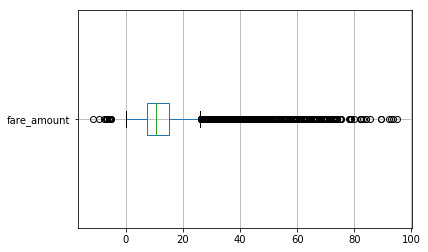

In [899]:
data.boxplot('fare_amount', vert=False)

How about we inspect the data points with `fare amount > 75`?

In [900]:
data[data.fare_amount >= 75]

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration
tpep_pickup_datetime,,,,,,,,,
2017-01-15 05:41:13,2,2017-01-15 06:38:53,1,30.29,132,162,1,84.0,3460.0
2017-02-18 00:21:11,1,2017-02-18 01:20:44,1,27.50,213,212,1,80.0,3573.0
2017-04-06 21:12:40,1,2017-04-06 22:11:39,1,29.80,261,265,1,82.5,3539.0
2017-04-20 08:54:32,1,2017-04-20 09:52:53,2,30.50,100,265,2,84.0,3501.0
2017-04-27 04:05:25,1,2017-04-27 04:52:56,1,28.80,163,222,3,79.0,2851.0
2017-04-28 23:50:40,2,2017-04-29 00:48:44,2,28.14,230,27,2,78.5,3484.0
2017-05-07 08:45:42,1,2017-05-07 09:40:29,1,26.40,230,138,1,75.5,3287.0
2017-05-17 04:53:31,2,2017-05-17 05:47:44,1,36.13,132,190,1,95.0,3253.0
2017-05-23 22:47:43,1,2017-05-23 23:34:18,1,35.50,138,265,3,93.5,2795.0


All the data points seem fine except the one in the final row. The `trip distance` is ~30 miles and the `trip duration` is ~6.5 minutes which is not feasible! Let's delete that row and place a lower limit of `S3.00` for the `fare amount`.

In [901]:
# Remove records where fare amount < $3.00
data = data[data.fare_amount >= 3]

# Delete invalid row mentioned above.
data.drop(pd.Timestamp('2017-12-22 00:32:12'), inplace=True)

## Cleaning all Other Columns and Creating Categories

Apart from `pickup/dropoff` datetimes, `trip durations`, `trip distances`, and `fare amounts`, all other columns can be treated as categories having discrete values. We will first check/remove any inconsisties, and then convert the data into categories for improved storage and efficieny of operations.

### Passenger Count

From a logical standpoint, `passenger_count` should not be `< 1` or `> 6`. Looking at the data reveals some issues.

In [902]:
# Checking for any invalid passenger counts
data.passenger_count.value_counts()

1    158944
2     32607
5     10641
3      9478
6      6451
4      4617
0       268
Name: passenger_count, dtype: int64

We need to remove the records where the `passenger_count = 0` as this is definitely a data error. Then, we'll convert the `passenger_count` column from type `int64` to type `category`.

In [903]:
# Removing records where passenger count is 0 or 9
data = data[(data.passenger_count != 0)]

In [904]:
# Converting passenger_count from type int64 to category
data.passenger_count = data.passenger_count.astype('category')

### VendorID, Payment Type, PULocation ID and DOLocation ID

All the other fields were perfect, so I saved you the grunt, and converted them to categories.

In [905]:
# Converting extra charge from type float64 to category
data.VendorID = data.VendorID.astype('category')
data.payment_type = data.payment_type.astype('category')
data.PULocationID = data.PULocationID.astype('category')
data.DOLocationID = data.DOLocationID.astype('category')

## Cleaning Disproportionate Data

We've analyzed many of the columns on an individual basis. Now it's time to compare columns against each other to make sure the data makes sense.

We have already compared `pickup` and `dropoff` datetimes, filtering journeys with unrealistically long or short durations. We now want to compare specific variables against each other to see if there are any outliers. Namely, we want to look at:
 - Distance vs Trip Duration
 - Distance vs Fare Amount
 - Fare Amount vs Trip Duration

Let's begin by plotting 3 scatter plots of the data above.

 ### Distance vs Trip Duration

Text(14,300,'Outlier')

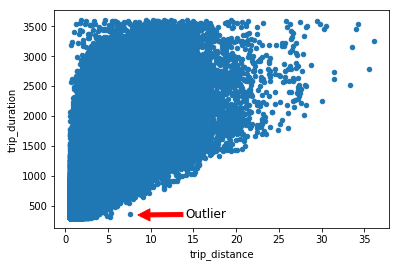

In [906]:
data.plot(kind='scatter', x='trip_distance', y='trip_duration')
plt.annotate(s='Outlier', xy=(8.5, 350), xytext=(14, 300), arrowprops={'color': 'red'}, size=12)

### Distance vs Fare Amount

Text(11,4,'Outlier')

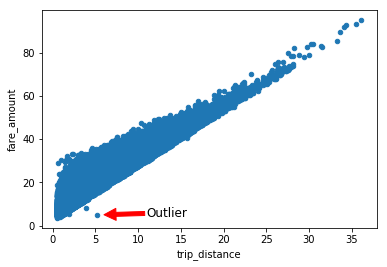

In [907]:
data.plot(kind='scatter', x='trip_distance', y='fare_amount')
plt.annotate(s='Outlier', xy=(6.0, 5), xytext=(11, 4.0), arrowprops={'color': 'red'}, size=12)

### Fare Amount vs Trip Duration

Text(2,2600,'Outliers')

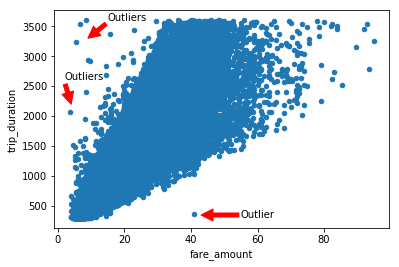

In [908]:
data.plot(kind='scatter', x='fare_amount', y='trip_duration')
plt.annotate(s='Outlier', xy=(43, 350), xytext=(55, 300), arrowprops={'color': 'red'}, size=10)
plt.annotate(s='Outliers', xy=(9, 3300), xytext=(15, 3600), arrowprops={'color': 'red'}, size=10)
plt.annotate(s='Outliers', xy=(4, 2200), xytext=(2, 2600), arrowprops={'color': 'red'}, size=10)

Unsurprisingly, the data doesn't look so bad. Upon inspection, a few anomalies were noted (shown above) and deleted (below). The dataset is by no means 'perfect', but it is a lot cleaner thn we started with.

In [909]:
to_del = ['2017-01-09 12:20:48', '2017-02-08 08:49:10', '2017-03-03 08:29:53', '2017-05-07 20:33:02',
 '2017-06-12 17:38:48', '2017-07-14 09:49:16', '2017-08-21 18:04:46', '2017-11-01 07:27:06',
 '2017-04-18 07:59:43', '2017-09-20 12:44:01']
data.drop([pd.Timestamp(x) for x in to_del], inplace=True)

Here is what the 3 plots like after a few anomalies were removed.

### Distance vs Trip Duration

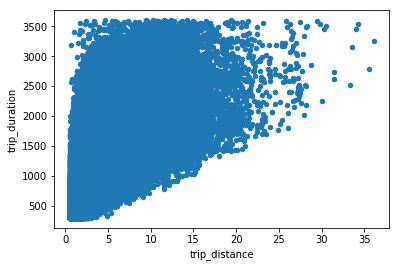

In [910]:
data.plot(kind='scatter', x='trip_distance', y='trip_duration')

### Distance vs Fare Amount

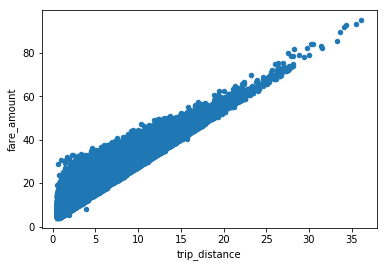

In [911]:
data.plot(kind='scatter', x='trip_distance', y='fare_amount')

### Fare Amount vs Trip Duration

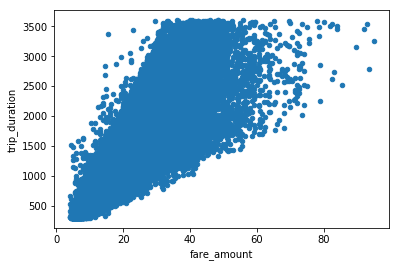

In [912]:
data.plot(kind='scatter', x='fare_amount', y='trip_duration')

## Adding Extra Features

The data is looking great. Well done for following along!

As a final step, we need to add some additional features to improve our modelling algorithms. Namely, we need to add columns indicating:
1. Time of Day: `{Early Morning, Morning, Afternoon, Evening, Late Night, Overnight}`
2. Rush Hour: `{True, False}`
3. Weekday: `{True, False}`

In [913]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222728 entries, 2017-01-01 00:03:37 to 2017-12-31 23:48:11
Data columns (total 9 columns):
VendorID                 222728 non-null category
tpep_dropoff_datetime    222728 non-null datetime64[ns]
passenger_count          222728 non-null category
trip_distance            222728 non-null float64
PULocationID             222728 non-null category
DOLocationID             222728 non-null category
payment_type             222728 non-null category
fare_amount              222728 non-null float64
trip_duration            222728 non-null float64
dtypes: category(5), datetime64[ns](1), float64(3)
memory usage: 10.0 MB


In [ ]:
# Del Payment type & Vendor ID